In [1]:
# *****************************
# Step 1. Import Libraries and Define Column Names
# *****************************
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. Define the Column Names (55 columns total)
# The first 10 are numerical measurements
cols = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]

# The next 4 are Wilderness Areas (Binary)
for i in range(4):
    cols.append(f"Wilderness_Area_{i+1}")

# The next 40 are Soil Types (Binary)
for i in range(40):
    cols.append(f"Soil_Type_{i+1}")

# The last one is the Target (What we want to predict)
cols.append("Cover_Type")

In [3]:
df = pd.read_csv('covtype.data.gz', header=None, names=cols)
print("Success! Data loaded.")
print(df.head())

Success! Data loaded.
   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            

In [4]:
print(f"Dataset Loaded. Shape: {df.shape}")
df.head() # Shows the first 5 rows

Dataset Loaded. Shape: (581012, 55)


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
# *****************************
# Step 2: Sampling and Splitting
# *****************************

from sklearn.model_selection import train_test_split

# 1. Sample the data (Optional but recommended for speed initially)
# We take 20% of the data just to test our code runs fast.
# Once your code works, you can comment this out to use the full 581k rows.
df_small = df.sample(frac=0.2, random_state=42)

# 2. Separate Features (X) and Target (y)
X = df_small.drop('Cover_Type', axis=1)
y = df_small['Cover_Type']

In [6]:
# 3. Split into Train (80%) and Test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training on {X_train.shape[0]} samples.")
print(f"Testing on {X_test.shape[0]} samples.")

Training on 92961 samples.
Testing on 23241 samples.


In [7]:
# *****************************
# Step 3: Pre-processing (Scaling)
# *****************************

from sklearn.preprocessing import StandardScaler

# 1. Initialize the Scaler
scaler = StandardScaler()

# 2. Fit on Train, Transform Train
# (Learn the mean/std from the study material)
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform Test
# (Apply that same scaling to the exam - DO NOT fit on test data!)
X_test_scaled = scaler.transform(X_test)


In [8]:
# *****************************
# Step 4: Training the Logistic Regression Model
# *****************************

from sklearn.linear_model import LogisticRegression

# Initialize the model
# solver='saga' is faster for large datasets
# max_iter=1000 gives it enough time to find the best mathematical line
log_reg = LogisticRegression(solver='saga', max_iter=5000)

print("Training Model... (This might take a minute)")
log_reg.fit(X_train_scaled, y_train)
print("Training Complete.")

Training Model... (This might take a minute)
Training Complete.


In [9]:
# *****************************
# Step 5: Evaluation
# *****************************

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# 1. Accuracy Score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# 2. Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.72

Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.70      0.71      8531
           2       0.75      0.80      0.77     11269
           3       0.66      0.81      0.73      1442
           4       0.44      0.31      0.36        91
           5       0.23      0.01      0.01       421
           6       0.46      0.20      0.28       704
           7       0.72      0.55      0.63       783

    accuracy                           0.72     23241
   macro avg       0.57      0.48      0.50     23241
weighted avg       0.71      0.72      0.71     23241



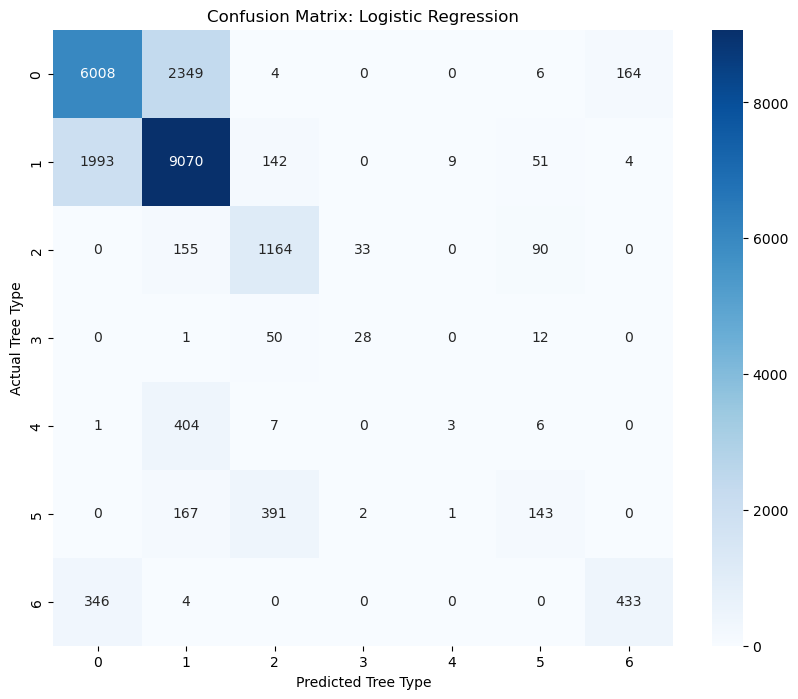

In [10]:
# 3. Visual Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Tree Type")
plt.ylabel("Actual Tree Type")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

# 1. Initialize the Random Forest
# n_estimators=100: It will build 100 trees.
# n_jobs=-1: It uses ALL your computer cores to train faster (Crucial for speed!)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# 2. Train the Model
print("Training Random Forest... (This uses multiple cores, so it's usually fast)")
rf_model.fit(X_train_scaled, y_train) 
print("Training Complete.")

# 3. Evaluate
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Compare Scores
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Training Random Forest... (This uses multiple cores, so it's usually fast)
Training Complete.
Random Forest Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90      8531
           2       0.90      0.94      0.92     11269
           3       0.87      0.92      0.89      1442
           4       0.81      0.65      0.72        91
           5       0.91      0.57      0.70       421
           6       0.88      0.74      0.80       704
           7       0.95      0.87      0.90       783

    accuracy                           0.91     23241
   macro avg       0.89      0.80      0.84     23241
weighted avg       0.91      0.91      0.90     23241



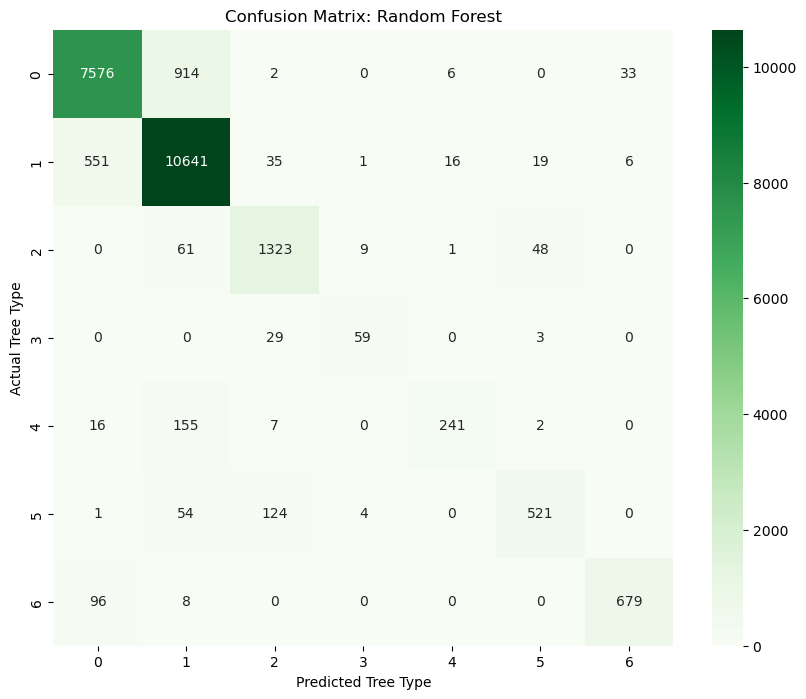

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
# Note: I changed the color to 'Greens' so you can instantly tell it apart from the Blue one!
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted Tree Type")
plt.ylabel("Actual Tree Type")
plt.show()